# Stock Price Prediction using Linear Regression

In this project, we explore the fascinating world of stock price prediction using data analysis and machine learning. We leverage historical stock data, machine learning algorithms, and data visualization to gain insights into the financial markets.

**Key Components:**

- **Data Collection:** We gather historical stock data, including open, high, low, close, adjusted close prices, and volume.

- **Feature Engineering:** We select relevant features, focusing on the "Open" price as our primary input variable for prediction.

- **Machine Learning:** We employ *Linear Regression*, a fundamental regression algorithm, to build our predictive model.

- **Model Training:** Our model is trained on historical data to capture patterns and relationships in the stock market.

- **Model Evaluation:** We evaluate the model's performance using metrics like Mean Squared Error (MSE) and R-squared (R2).

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

## 1. Data Collection

In [2]:
df = pd.read_csv("Stock_Price_data_set.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


## 2. Feature Engineering

In [4]:
# Date needs to be converted to correct datatype
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1009 non-null   datetime64[ns]
 1   Open       1009 non-null   float64       
 2   High       1009 non-null   float64       
 3   Low        1009 non-null   float64       
 4   Close      1009 non-null   float64       
 5   Adj Close  1009 non-null   float64       
 6   Volume     1009 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 55.3 KB


## 3. Model Training 

In [5]:
X = df[['Open']].values
y = df['Close'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# Make Predictions on the Test Data
y_pred = model.predict(X_test)

## 4. Data Visualisation

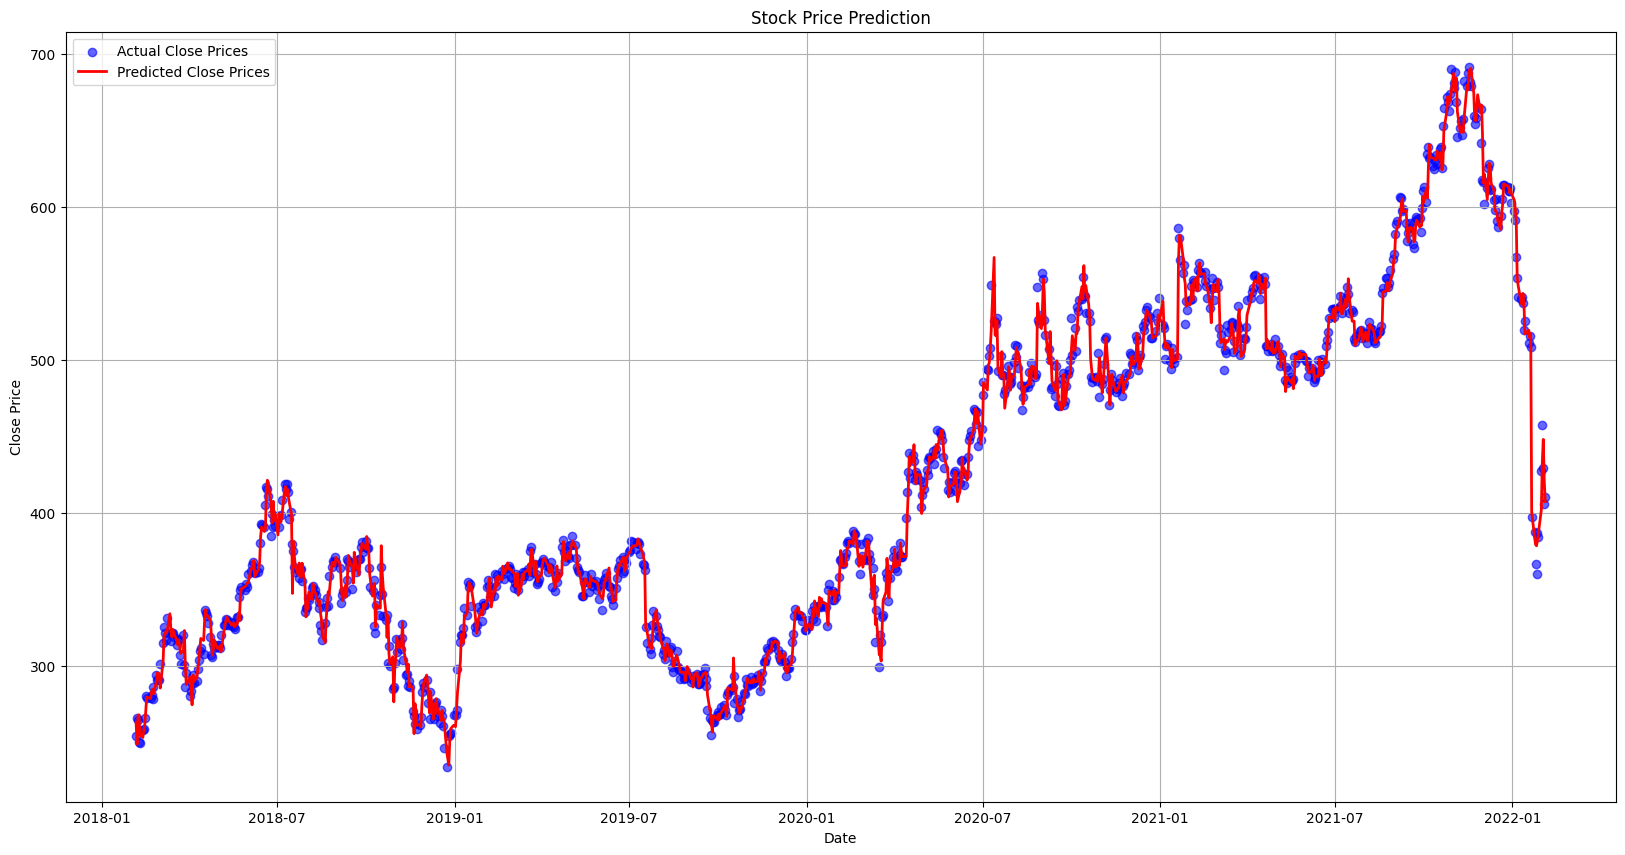

In [6]:
plt.figure(figsize=(20, 10))
plt.scatter(df['Date'], df['Close'], color='blue', label='Actual Close Prices', alpha=0.6)
plt.plot(df['Date'], model.predict(X), color='red', linewidth=2, label='Predicted Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Stock Price Prediction')
plt.legend()
plt.grid(True)
plt.show()

## 5. Model Evaluation

In [7]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error: ", mse)
print("R-Squared: ", r2)

Mean Squared Error:  65.57273955726973
R-Squared:  0.9943762942332327


## What do these mse and r2 score values mean ?

### Mean Squared Error (MSE)

Mean Squared Error (MSE) is a commonly used metric for evaluating the performance of regression models. It measures the average squared difference between the predicted values and the actual (observed) values. MSE quantifies the quality of a model's predictions, with lower values indicating better performance.

- **Interpretation:** A lower MSE indicates that the model's predictions are closer to the actual values, signifying a better fit to the data.

- **Range:** MSE values can range from 0 to infinity. Ideally, you want to minimize MSE, but the absolute value doesn't have a fixed interpretation since it depends on the scale of the data.

### R-squared (R2) Score

R-squared (R2) Score, also known as the coefficient of determination, assesses the proportion of variance in the dependent variable that is explained by the independent variables in a regression model. It provides insight into how well the model captures the variability in the data.

- **Interpretation:** R2 Score ranges from 0 to 1. A higher R2 score indicates that a larger proportion of the variance in the dependent variable is explained by the independent variables in the model. In other words, it measures the goodness of fit of the model. An R2 score of 1 means the model perfectly fits the data, while a score of 0 means the model provides no improvement over a simple mean.

- **Common R2 Values:**
  - R2 = 0: The model does not explain any of the variance in the data.
  - 0 < R2 < 1: The model explains some portion of the variance, with higher values indicating better explanatory power.
  - R2 = 1: The model perfectly fits the data, explaining all the variance.

***In summary, when evaluating regression models:***
- Lower MSE values indicate better prediction accuracy.
- Higher R2 scores suggest better model fit and explainability of the dependent variable.

Remember that while these metrics are helpful, it's crucial to consider them alongside domain knowledge and the specific context of your problem to make informed decisions about model performance.